# Binomial model - Case studies

_Adapted from Josep Fortiana (2023-03-13) by Jordi Abante (2024-03-11)_

# Case study 3: Placenta previa

A classical problem from the book by Andrew Gelman and others, _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

Placenta previa is a problem in pregnancy where the placenta implants low on the uterus, potentially obstructing the birth canal. An early study concerning the sex of placenta previa births in Germany found that of a total of 980 births, 437 were female. How much evidence does this provide for the claim that the proportion of female births in the population of placenta previa births is less than 0.485, the proportion of female births in the general population?

We know that: 

1. The proportion of female births in this population is 48.5\%. 

2. A study of 980 placenta previa births found that 437 (44.6\%) of them were female. 

How much evidence does this provide for the claim that the proportion of female births in the population of placenta previa
births is is less than 0.485?

## Analysis using a nonconjugate prior distribution 

### _(a) A discrete prior_

In the BDA3 book they consider conjugate (Beta) priors, just as in the previous two Case Studies. Here, instead, we will use their next suggestion, a nonconjugate prior. As a first stage, as a sort of springboard, we take a very simple, discrete prior. To this end we add a fictitious historical proportion (from another state, say) of 45.0%. We assume a priori that both historical figures are equally probable.

### The discrete prior

Thus, our discrete prior is:

$$
	\begin{array}{lcl}
	\theta_{1}=0.485	&\text{ with probability }	&\pi_{1}\equiv P(\theta_{1})=0.5,\\
	\theta_{2}=0.45		&\text{ with probability }	&\pi_{2}\equiv P(\theta_{2})=0.5.
	\end{array}
$$

In [1]:
# Prior information
theta.1<-0.485
theta.2<-0.45
Prior.1<-0.5
Prior.2<-0.5
LogPrior.1<-log(Prior.1)
LogPrior.2<-log(Prior.2)

### Observed data

In [2]:
# Observed data
n<-980
x<-437
theta.obs<-x/n
round(theta.obs,3)

[1] 0.446

### Likelihood

Likelihood is the usual binomial one:

$$
    f(x|\theta)=\theta^{x}\cdot(1-\theta)^{(n-x)}.
$$

In actual computations it may be safer to use its logarithm, _Log-likelihood,_ to avoid products of very large and very small quantities.

In [3]:
Lik<-function(x,theta,n){theta^x*(1-theta)^(n-x)}
LogLik<-function(x,theta,n){x*log(theta)+(n-x)*log(1-theta)}

Note that the log of the unnormalized posterior ($p(\theta|x)\propto p(x|\theta)p(\theta)=p_u(\theta|x)$) can be written as:
$$
\log p_u(\theta|x) = \log (p(x|\theta)\cdot p(\theta))  = \log p(x|\theta) + \log p(\theta)
$$

### Posterior

Likelihood, joint pdf and their logarithms. Bayes formula needs the x marginal in the denominator to give the posterior pdf, but we can circumvent this step by normalizing to one the _non-normalized_ posterior pdf. Observe that, consistently with the data, the posterior probability of 0.45 is much higher than its prior value:

In [4]:
LogPost.1<-LogLik(x,theta.1,n)+LogPrior.1
LogPost.2<-LogLik(x,theta.2,n)+LogPrior.2
Post.1<-exp(LogPost.1)
Post.2<-exp(LogPost.2)
S<-(Post.1+Post.2)
Post.1<-Post.1/S
Post.2<-Post.2/S
round(Post.1,3)
round(Post.2,3)

[1] 0.049

[1] 0.951

Under this prior, the data would support $\theta=\theta_2$ over that of the general population, suggesting that the rate of female births is smaller for placenta previa births. This discrete prior, however, is probably too simple so let's consider other non-conjugate priors.

## Analysis using a nonconjugate prior distribution 

### _(b) A triangular pdf_

In the BDA3 book they consider first conjugate (Beta) priors, just the same procedure as in the two previous Case Studies, which you can follow as a (highly recommended) exercise. Here, instead, we will use their next suggestion,
namely the triangular pdf in the figure:

<div>
<img src="./Placenta.previa.Nonconjugate.prior.jpg" width="400">
</div>

This pdf has the following specifications:

1. It is centered at $m=0.485$ (i.e., $\theta_1$)

2. 40% of the probability mass is outside the interval [m-c,m+c]=[0.385,0.585], c=0.100.

# Exercise 01

From the information above, check that the equation of this pdf is:

$$
    h(t)=\left\{
    \begin{array}{lcl}
         a,        &\text{ for }  &0<t<m-c \quad\text{and } m+c<t<1,\\
         A+b\cdot t/c,  &\text{ for }  &t\in [m-c,c],\\ 
         B-b\cdot t/c   &\text{ for }  &t\in [c,m+c],\\ 
    \end{array}
    \right.\mskip80mu t \in[0,1]
$$

where $a=0.50$, $b=5.00$ is the height of the central triangle ($a+b$ is the peak ordinate), $A=a+b-(b\cdot m)/c$,
$B<-a+b+(b\cdot m)/c$.

Write a function `h()`to compute the pdf $h(t)$, plot it (verify that the integral on $[0,1]$ is indeed equal to 1),
compute its expectation and variance.
_Hint: $a$ is determined by the equation $0.40=p_{tails} = a\cdot(1-2\cdot c)$, then the area of the upper central isosceles triangle is $c\cdot b = 1-a =0.5$._

<div>
<img src="./Placenta.previa.Nonconjugate.prior.1.jpg" width="400">
</div>

In [227]:
# here we define h(t)
m<-0.485
c<-0.100
p.tails<-0.4  
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

### Discretizing the continuous prior

Next we construct a grid of $N$ points $\mathbf{t}=(t_1,\dots,t_{N-1})$ on the $[0,1]$. On each interval $[t_{i},t_{i+1}]$, $1\leq i\leq N-1$, the probability from the prior pdf, the integral of $h(t)$ on it, is approximated by the rectangle area $h(t_i)\cdot\delta$, where $\delta=1/N$. The discrete r.v. defined by both vectors: values $\mathbf{t}$ and probabilities $h(\mathbf{t})\cdot \delta$ is a _discretization_ of the continuous r.v. with pdf $h$, a reasonable approximation by a discrete distribution of the given continuous probability distribution. We proceed with this discrete r.v. as in the example above.

In [228]:
n<-980
x<-437
N<-1000 # number of grid intervals
t<-seq(0,1,length=N)
t<-t[-N]# remove last point (equal to 1: we want N intervals)

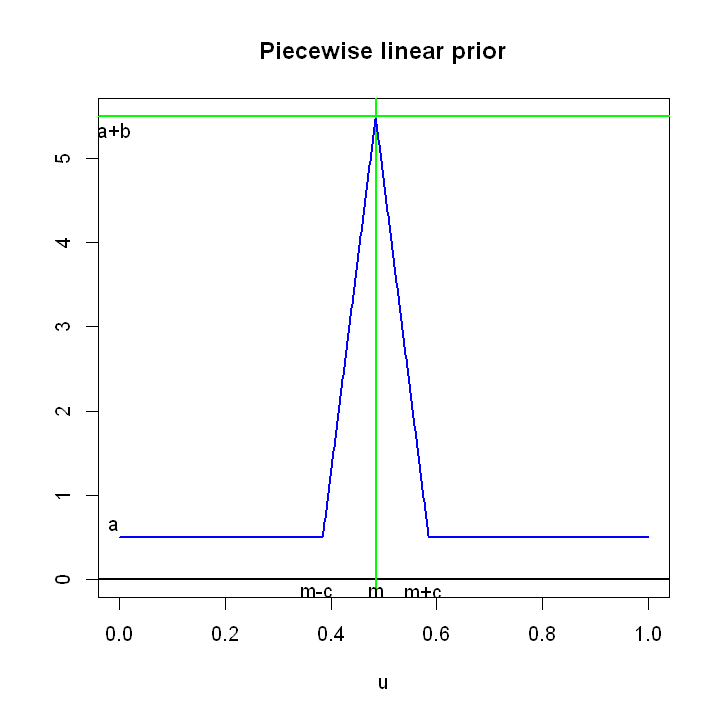

In [229]:
options(repr.plot.width=6,repr.plot.height=6)
u<-seq(0,1,length=N)
plot(u,h(u),"l",lwd=2,col="blue",xlim=c(0,1),ylim=c(0,5.5),ylab="",main="Piecewise linear prior")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(u,h(u),lwd=2,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")

In [230]:
#
# Lik and LogLik are the Bernoulli quantities defined above
# uncomment only one of the following three lines:
# Use plain likelihood or use logs and, in this case there is the alternative
# to use the dbinom() function (which we expect has been thoughtfully and robustly designed)
#
# Uncomment only one of the three statements:
# 1) Plain posterior
# nnpost<-Lik(x,t,n)*h(t)
# 2) Log posterior
log.nnpost<-LogLik(x,t,n)+log(h(t))
# 3) Log posterior using dbinom
# log.nnpost<-dbinom(x,size=n,prob=t,log=TRUE)+log(h(t))
#
nnpost<-exp(log.nnpost)

We can now normalize the PMF using the sum and obtain the CDF by taking the cumulative sum:

In [231]:
#
# NB. We do not bother to write delta=1/N in the probability values h(t)*delta. Furthermore,
# dbinom() is a multiple of Lik (times the combinatorial coefficient). All these constants
# will be taken care of when normalizing.
#
# Then these non normalized values, after normalized to unit sum, will be the pmf of a discretization of
# the posterior distribution.
#
dpost<-nnpost/sum(nnpost) # pmf
ppost<-c(0,cumsum(dpost)) # cdf

From this pmf/cdf for a discretization of the posterior pdf we can obtain any needed posterior quantity: posterior quantiles, in particular the posterior median, a 95% credible interval, the MAP and posterior expectation estimators of $\theta$, etc.

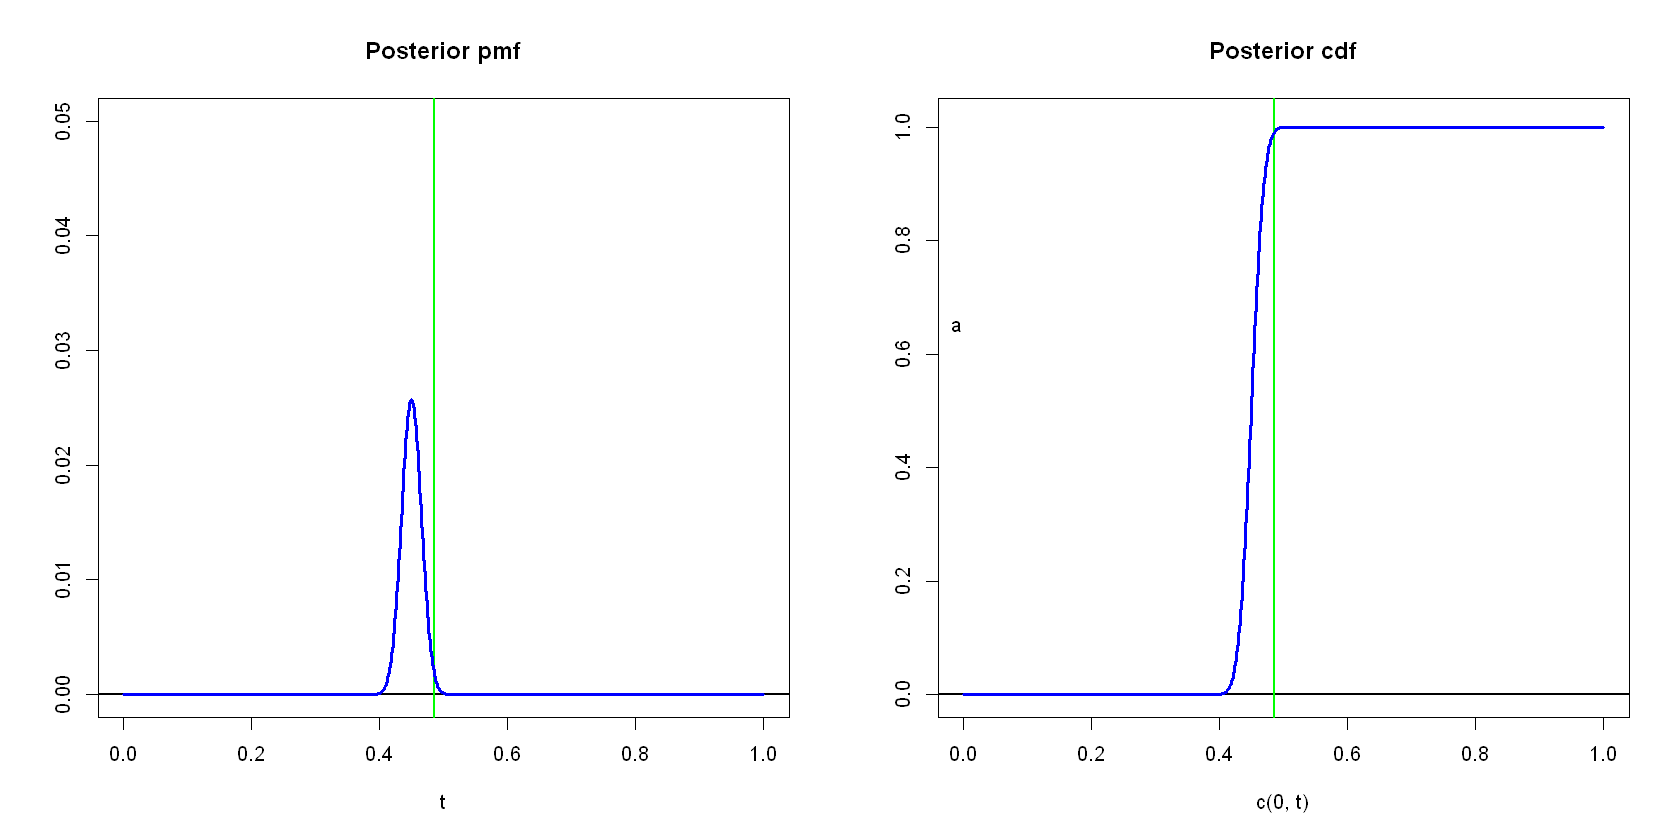

In [235]:
options(repr.plot.width=14,repr.plot.height=7)
old.par<-par(mfrow=c(1,2))
# pmf
plot(t,dpost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,0.05),ylab="",main="Posterior pmf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(t,dpost,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
# cdf
plot(c(0,t),ppost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,1.01),ylab="",main="Posterior cdf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(c(0,t),ppost,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
par(old.par)

# Exercise 02 - Further computations

In [424]:
# here we define h(t)
m<-0.485
c<-0.100
p.tails<-0.4  
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

## 02.01.

Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors. 

[1] "For alpha 1.00 and beta 1.00 with N=1000"
[1] "    ST Dev: 0.016000"
[1] "    Median: 0.445741"
[1] "    95% Interval: [0.414861, 0.479350]"
[1] "    Simulated MAP: 0.446669"
[1] "    Expectation of theta: 0.446029"


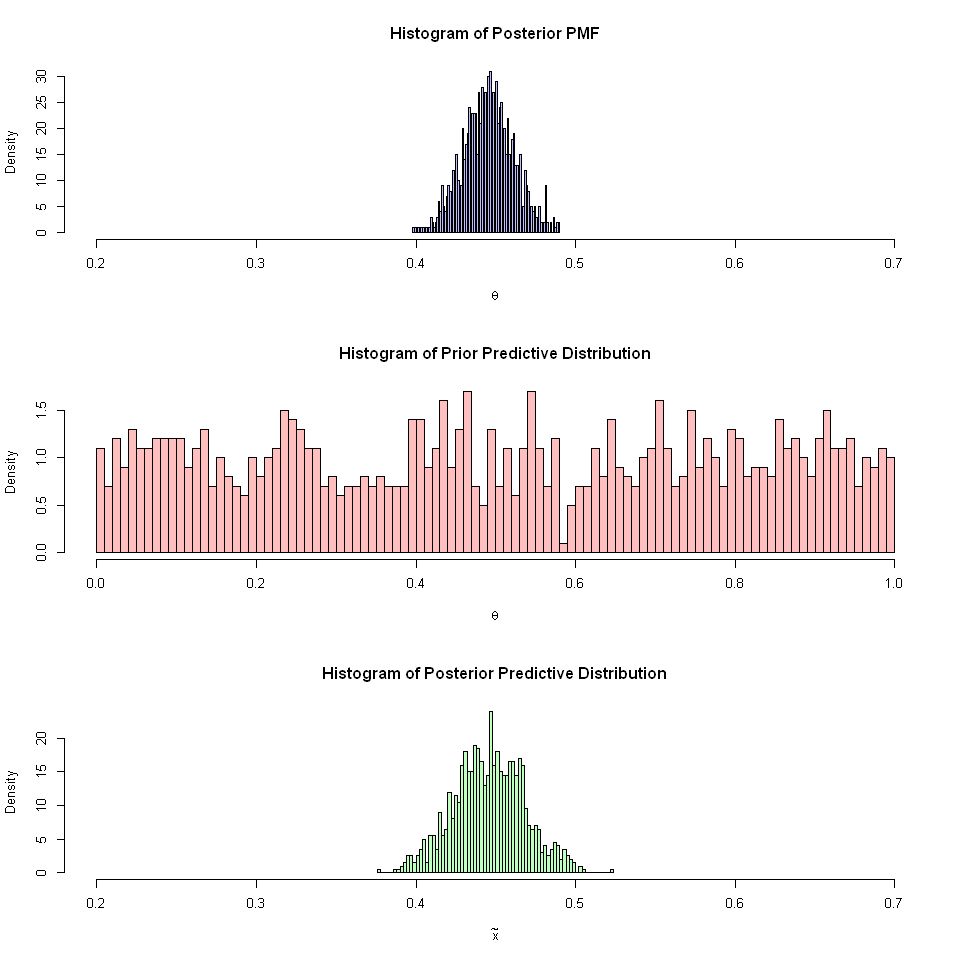

[1] "For alpha 0.97 and beta 1.03 with N=1000"
[1] "    ST Dev: 0.016916"
[1] "    Median: 0.445012"
[1] "    95% Interval: [0.413676, 0.479914]"
[1] "    Simulated MAP: 0.443646"
[1] "    Expectation of theta: 0.445998"


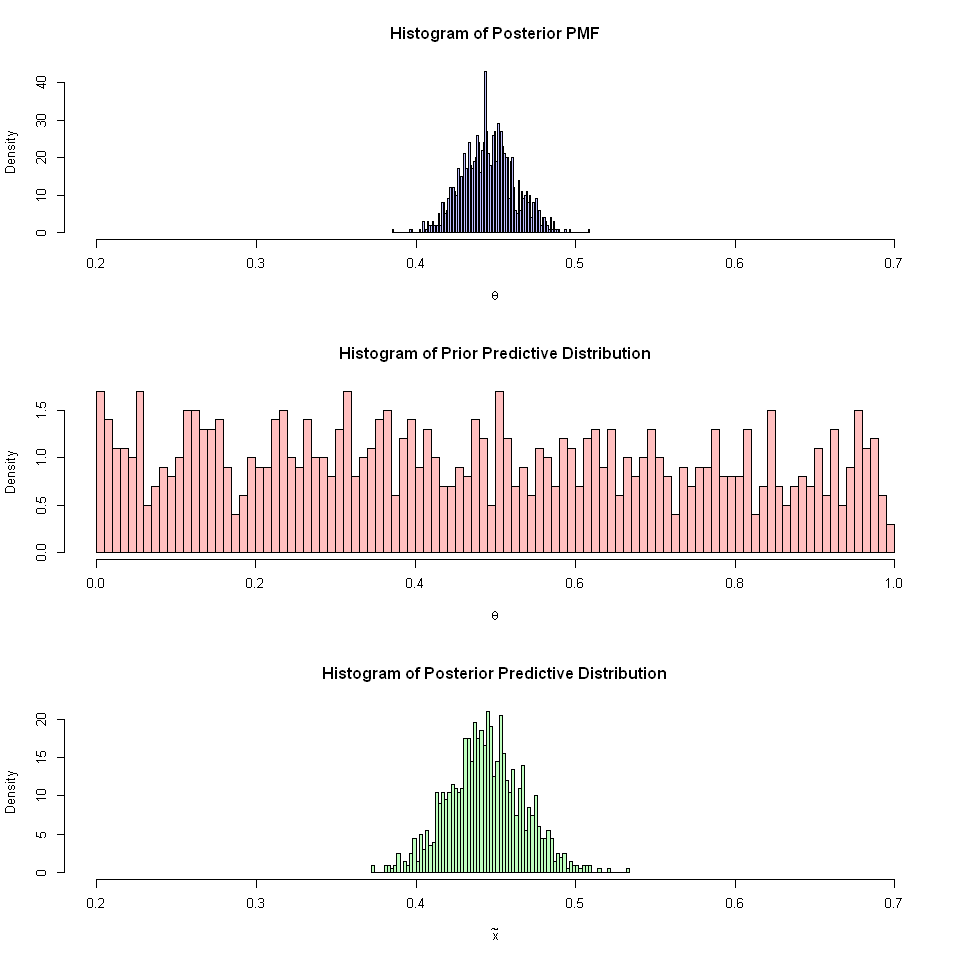

[1] "For alpha 2.42 and beta 2.58 with N=1000"
[1] "    ST Dev: 0.016272"
[1] "    Median: 0.444810"
[1] "    95% Interval: [0.414649, 0.478476]"
[1] "    Simulated MAP: 0.449638"
[1] "    Expectation of theta: 0.446117"


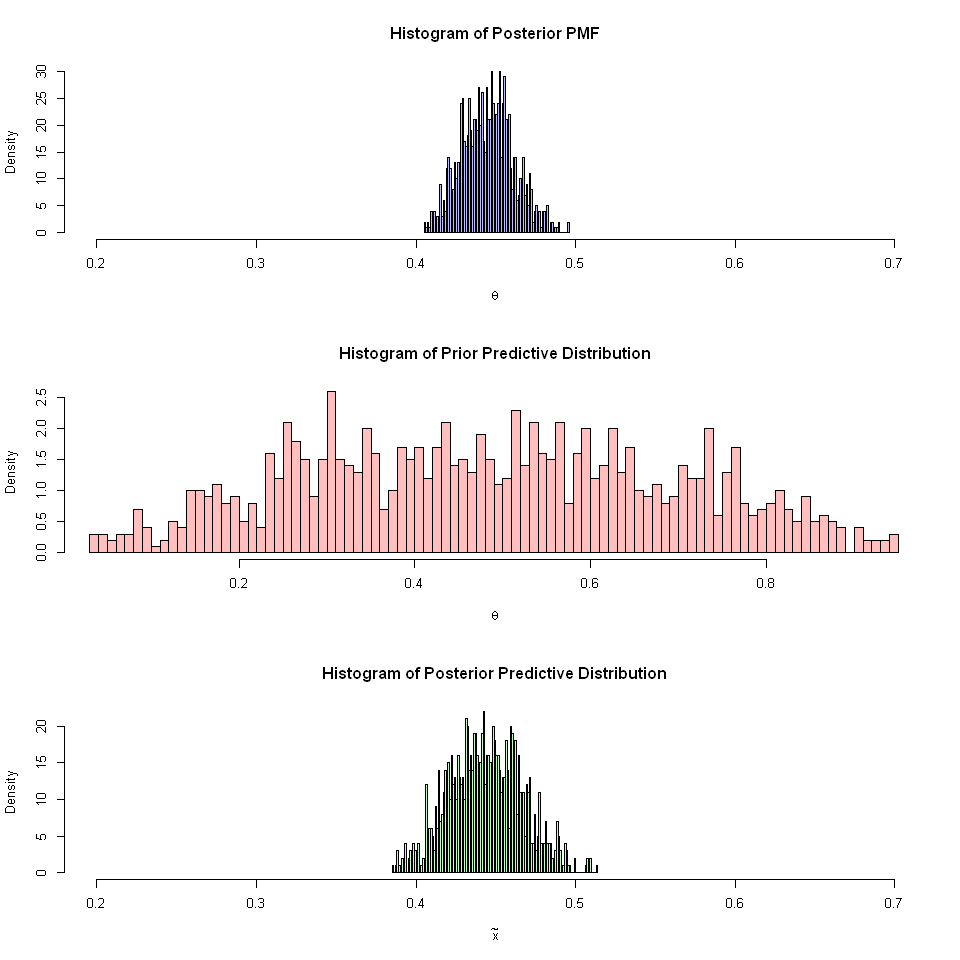

[1] "For alpha 4.85 and beta 5.15 with N=1000"
[1] "    ST Dev: 0.015905"
[1] "    Median: 0.445878"
[1] "    95% Interval: [0.416308, 0.477615]"
[1] "    Simulated MAP: 0.446047"
[1] "    Expectation of theta: 0.446313"


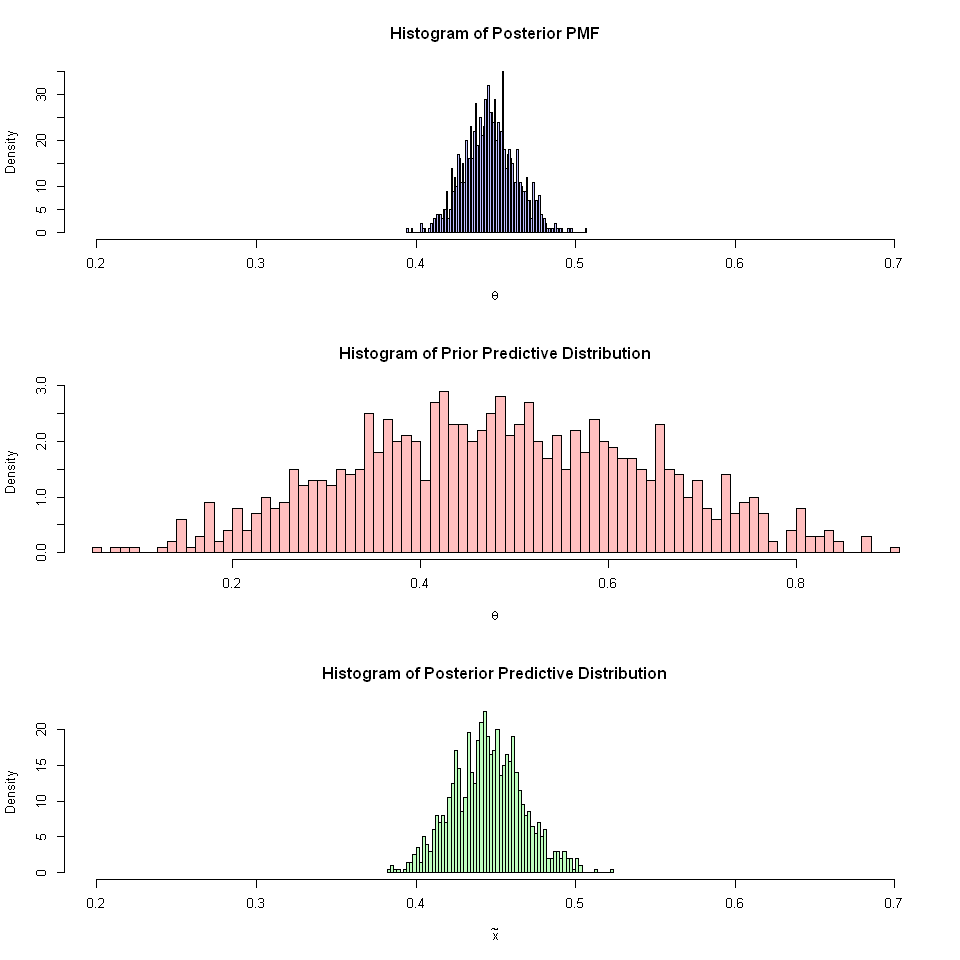

[1] "For alpha 9.70 and beta 10.30 with N=1000"
[1] "    ST Dev: 0.015704"
[1] "    Median: 0.447046"
[1] "    95% Interval: [0.416619, 0.478284]"
[1] "    Simulated MAP: 0.448226"
[1] "    Expectation of theta: 0.446700"


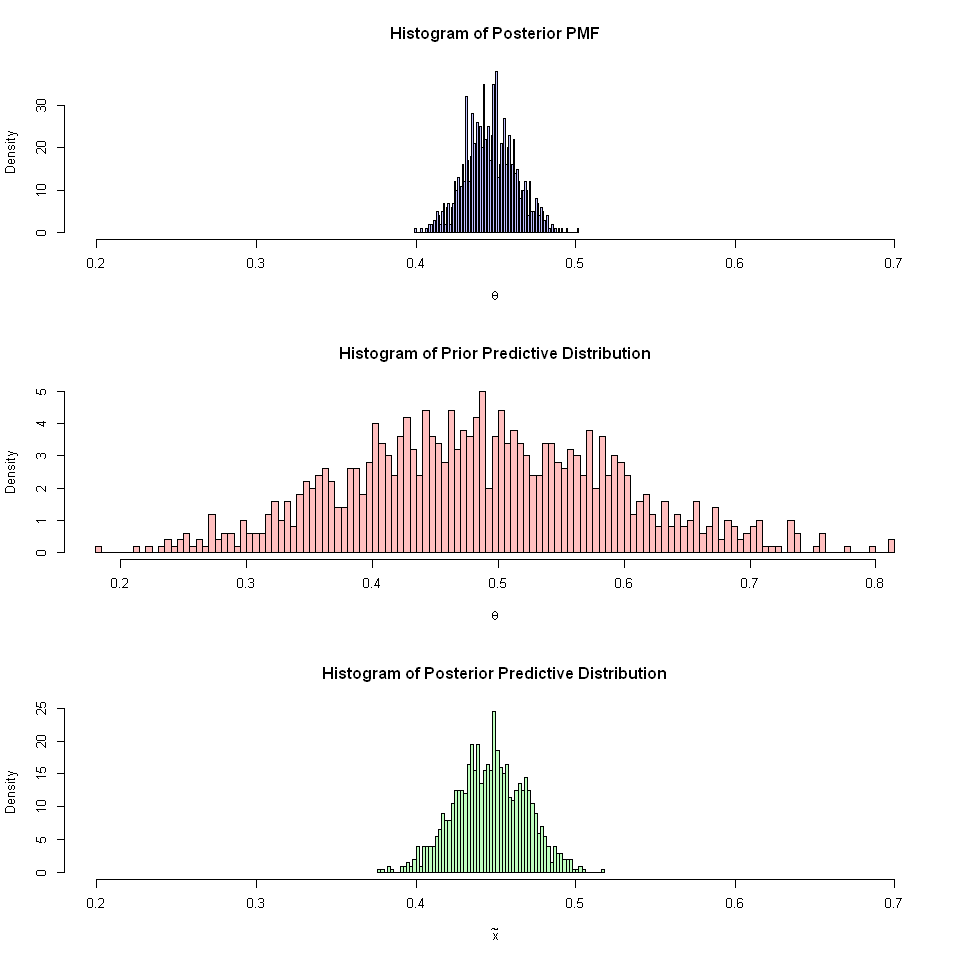

[1] "For alpha 48.50 and beta 51.50 with N=1000"
[1] "    ST Dev: 0.015249"
[1] "    Median: 0.450186"
[1] "    95% Interval: [0.420508, 0.481646]"
[1] "    Simulated MAP: 0.449170"
[1] "    Expectation of theta: 0.449537"


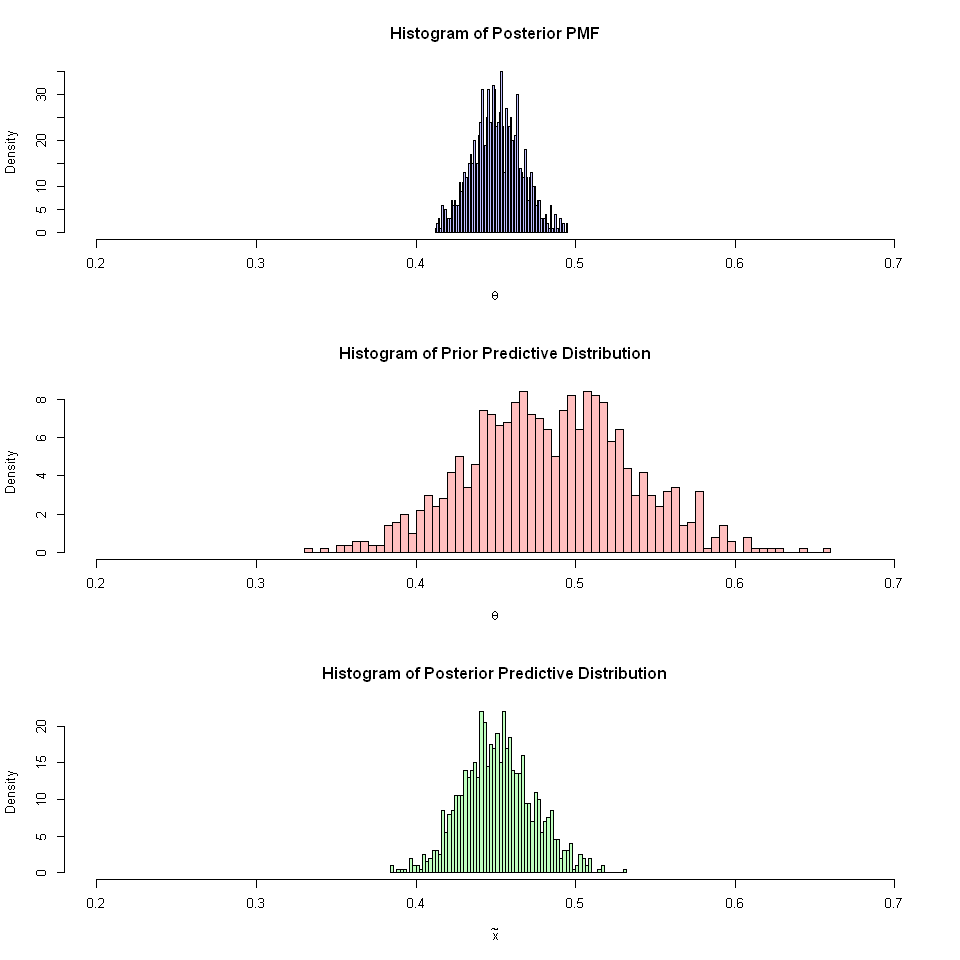

[1] "For alpha 97.00 and beta 103.00 with N=1000"
[1] "    ST Dev: 0.014341"
[1] "    Median: 0.452447"
[1] "    95% Interval: [0.423213, 0.480030]"
[1] "    Simulated MAP: 0.453776"
[1] "    Expectation of theta: 0.452542"


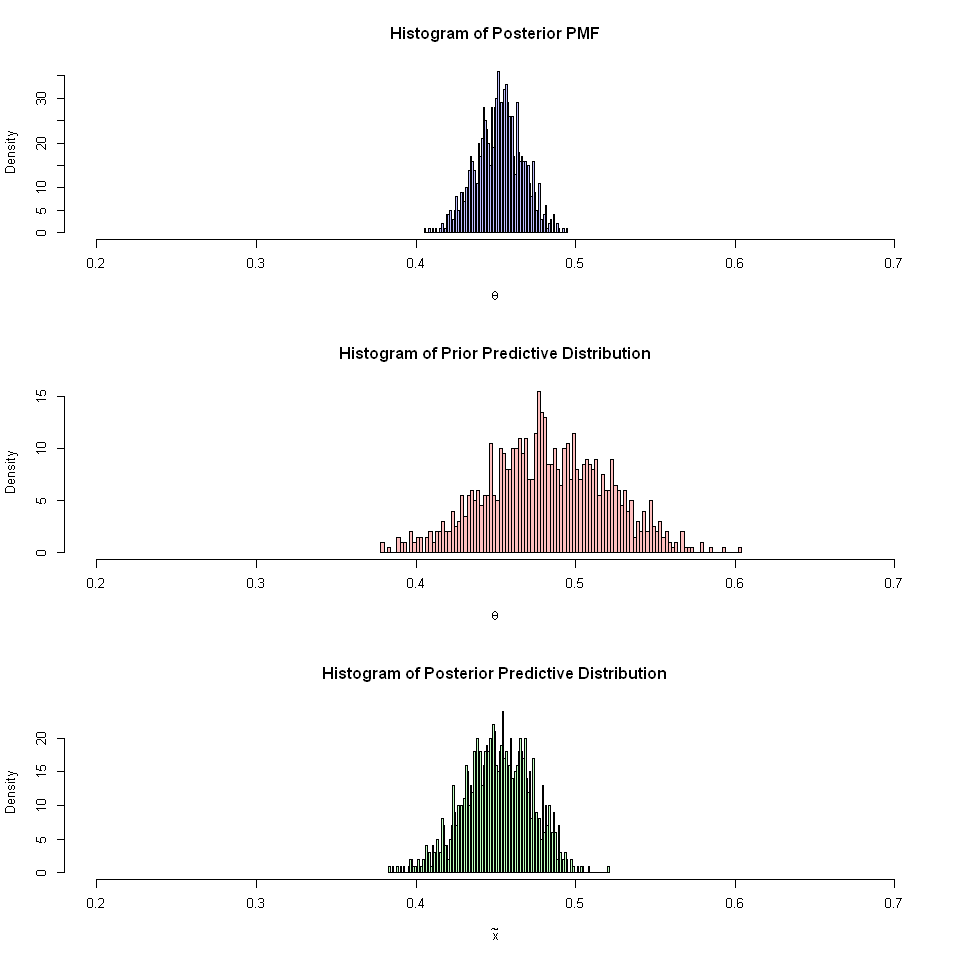

In [423]:
calculate_postpdf <- function(p1, p2, N){
    # p1 is alpha/(alpha+beta) and p2 is alpha+beta
    alpha <- p1*p2
    beta <-p2-alpha

    # Observations
    n<-980
    n1<-437
    x<-seq(0,1,by=0.001)
    # Prior pmf, we sample it with the previously calculated alpha and beta
    dprior<-rbeta(N, alpha, beta)
    # Posterior pmf, we add the observations for the posterior pmf
    alphapost <- alpha+n1
    betapost <- beta+n-n1
    dpost<-rbeta(N, alpha+n1, beta+n-n1)
    
    mean_post <- median(dpost) # Calculate the satistical moments,median and standard deviation
    stdev_post <- sd(dpost)
    
    # Prior predictive pmf
    nsim <- 1000
    dprior_pred<-rep(NA,nsim)
    for(i in 1:nsim){
        theta<-rbeta(1,shape1=alpha,shape2=beta) # sample the prior from the beta function of the original alpha and beta
        dprior_pred[i]<-rbinom(1,size=N,prob=theta)/N # sample the binomial with the thetas
    }

    # MAP
    dpost.dens <- density(dpost)
    MAP <- dpost.dens$x[which.max(dpost.dens$y)] # Get the maximum a posteriori value from the density
    # Posterior expectation of theta
    lamb <- n/(alpha+beta+n) # Get the expectation of theta from the formula
    expect_theta <- lamb*(n1/n)+(1-lamb)*(alpha)/(alpha+beta)
    
    # Plotting
    options(repr.plot.width=8,repr.plot.height=8) # options for plot size
    layout(matrix(1:3, nrow = 3)) # options for layout
    # plot histograms and save the posterior histogram
    dpost_h <- hist(dpost, breaks=100, freq=FALSE, col=rgb(0,0,1,1/4), xlim = c(0.2, 0.7), xlab=expression(theta), main="Histogram of Posterior PMF", ylab="Density")
    hist(dprior_pred, breaks=100, freq=FALSE, col=rgb(1,0,0,1/4), xlim = c(min(0.2,min(dprior_pred)), max(0.7,max(dprior_pred))), main="Histogram of Prior Predictive Distribution", xlab=expression(theta), ylab="Density")

    # Posterior predictive
    nsim <- 1000
    dpost_pred<-rep(NA,nsim)
    for(i in 1:nsim){
        theta<-sample(dpost_h$mids, 1, replace=TRUE, prob=dpost_h$counts) # sample directly from the posterior pmf historgram
        dpost_pred[i]<-rbinom(1,size=N,prob=theta)/N # Generate samples for new predictive x
    }

    hist(dpost_pred, breaks=100, freq=FALSE, col=rgb(0,1,0,1/4), xlim = c(0.2, 0.7), main="Histogram of Posterior Predictive Distribution", xlab=expression(tilde(x)), ylab="Density")
    
    # Print info
    print(sprintf("For alpha %.2f and beta %.2f with N=%d", alpha, beta,N))
    print(sprintf("    ST Dev: %f",stdev_post))
    print(sprintf("    Median: %f",mean_post))
    print(sprintf("    95%% Interval: [%f, %f]",dpost[order(dpost)[25]],dpost[order(dpost)[976]]))
    print(sprintf("    Simulated MAP: %f", MAP))
    print(sprintf("    Expectation of theta: %f", expect_theta))
}

# Here we test the different values for alpha and beta using two parameters p1 and p2
# Where:
# p1 = alpha/(alpha+beta),
# p2 = alpha+beta
# The last parameter is N for the number of trials for the pmfs
calculate_postpdf(0.5,2,1000)
calculate_postpdf(0.485,2,1000)
calculate_postpdf(0.485,5,1000)
calculate_postpdf(0.485,10,1000)
calculate_postpdf(0.485,20,1000)
calculate_postpdf(0.485,100,1000)
calculate_postpdf(0.485,200,1000)

As we can see, we created the histograms of the posterior PMF, the prior predictive and the posterior predictive for each alpha-beta pair. We also computed the relevant statistical moments and quatities from the posterior distribution. We also replicated here the figure from the book BDA and the table:
| $\frac{\alpha}{\alpha+\beta}$ | $\alpha+\beta$ | Posterior median of $\theta$ | 95% posterior interval for $\theta$ |
|-------------------------------|----------------|------------------------------|-------------------------------------|
| 0.500                         | 2              | 0.447                        | [0.415, 0.479]                      |
| 0.485                         | 2              | 0.445                        | [0.414, 0.478]                      |
| 0.485                         | 5              | 0.446                        | [0.414, 0.480]                      |
| 0.485                         | 10             | 0.446                        | [0.416, 0.478]                      |
| 0.485                         | 20             | 0.447                        | [0.417, 0.480]                      |
| 0.485                         | 100            | 0.450                        | [0.420, 0.478]                      |
| 0.485                         | 200            | 0.454                        | [0.425, 0.482]                      |   |   |


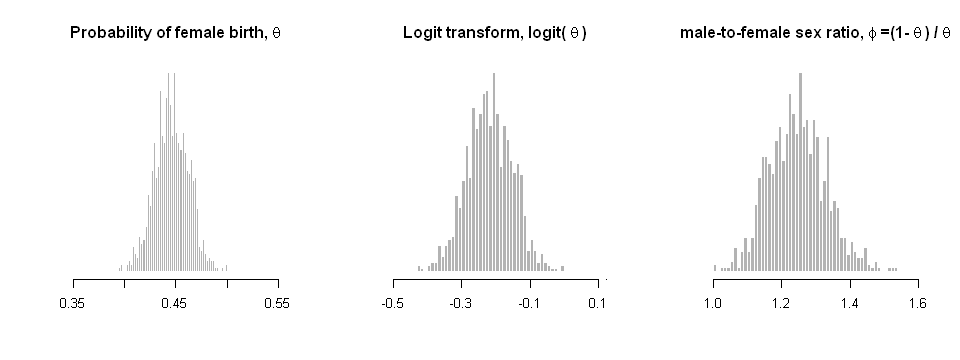

In [413]:
n <- 980
n1 <- 437
alpha <- 1
beta <- 1
dpost.book<-rbeta(1000, alpha+n1, beta+n-n1) # Get the beta distribution of Beta(348, 544) from the observations + Beta(1,1)
dpost.logit <- log(dpost.book/(1-dpost.book)) # Logit transform
dpost.maletofemale <- (1-dpost.book)/dpost.book # Male-to-female ratio

options(repr.plot.width=8,repr.plot.height=3) # options for plot size
layout(matrix(3:1, nrow = 1)) # options for layout
color.hists = rgb(0.7,0.7,0.7,1) # color of the histograms
hist(dpost.maletofemale, breaks=40, freq=FALSE, col=color.hists, xlim = c(1, 1.6), border=F, main=expression(bold("male-to-female sex ratio,"~phi~"=(1-"~theta~") /"~theta)),
     xlab="",ylab="", axes=F, bty = "n")
axis(side=1, at=seq(1,1.6, by= 0.2))
hist(dpost.logit, breaks=40, freq=FALSE, col=color.hists, xlim = c(-0.5, 0.1), border=F, main=expression(bold("Logit transform, logit("~theta~")")),
     xlab="",ylab="", axes=F, bty = "n")
axis(side=1, at=seq(-0.5, 0.1, by= 0.2))
axis(1, at = seq(0.35,0.55, by= 0.05), labels = NA)
hist(dpost.book, breaks=40, freq=FALSE, col=color.hists, xlim = c(0.35, 0.55), border=F, main=expression(bold("Probability of female birth,"~theta)),
     xlab="", ylab="", axes=F, bty = "n")
axis(side=1, at=seq(0.35,0.55, by= 0.1))
axis(1, at = seq(0.35,0.55, by= 0.05), labels = NA)


In [384]:
# Take piecewise prior pmf moments
dpost.expectation <- integrate(function(x) {return(x*h(x))}, lower=0, upper=1)$value # Use the integral of x*f(x), where f(x) = h(x) is the piecewise
                                                                                     # prior, integrate from 0 to 1 to get E[x]
dpost.variance <- integrate(function(x) {return((x^2)*h(x^2))}, lower=0, upper=1)$value - dpost.expectation^2 # Compute the integral E[x^2]-E[x]^2
dpost.expectation
dpost.variance

[1] 0.4924999

[1] 0.09806118

[1] 0.762811
[1] 0.7860442


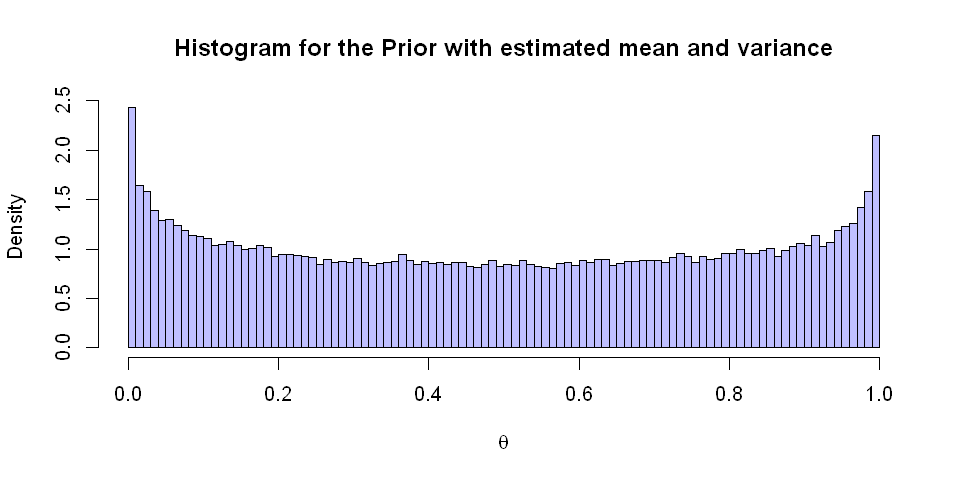

In [422]:
# We can estimate the alpha and beta from the formulas for Expectation and Variance for a beta distribution:
# E[X] = alpha/(alpha+beta)
# Var[X] = (alpha*beta)/((alpha+beta+1)*(alpha+beta)^2)
#
# Solving for alpha and beta we get:
# alpha = ((1-E[X])/(Var[X])-1/(E[X]))*(E[X]^2)
# beta = alpha*(1/E[X]-1)
alpha.est <- ((1-dpost.expectation)/(dpost.variance)-1/(dpost.expectation))*(dpost.expectation^2)
beta.est <- alpha.est*(1/dpost.expectation-1)
print(alpha.est)
print(beta.est)

options(repr.plot.width=8,repr.plot.height=4) # options for plot size
dprior_est<-rbeta(100000, alpha.est, beta.est) # Create samples for the prior with the alpha_0 and beta_0
hist(dprior_est, breaks=100, freq=FALSE, col=rgb(0,0,1,1/4), xlab=expression(theta), ylab="Density", 
     main=expression(bold("Histogram for the Prior with estimated mean and variance")))

Lastly let's analyse the quantities for the posterior and both priors ($\beta_0$, $\alpha_0$; and piecewise prior).

In [444]:
dpost.dens <-density(dpost.book)
dpost.sim.MAP <- dpost.dens$x[which.max(dpost.dens$y)] # MAP
dpost.sim.Expectation <- mean(dpost.book) # Posterior expectation
dpost.sim.Variance <- var(dpost.book) # Posterior variance
dpost.sim.Quartiles <- quantile(dpost.book,c(0,0.25,0.50,0.75,1)) # Posterior quartiles
gamma<-0.95 # 95% interval
delta<-(1-gamma)/2 # get delta
dpost.sim.interval <- as.numeric(quantile(dpost.book,c(delta,1-delta))) # Compute interval

# Print quantities
sprintf("Quantities for Posterior")
sprintf("MAP")
round(dpost.sim.MAP,5)
sprintf("Expectation")
round(dpost.sim.Expectation,5)
sprintf("Variance")
round(dpost.sim.Variance,5)
sprintf("Quartiles")
round(dpost.sim.Quartiles,5)
sprintf("Credible interval 02 (%5.2f %%): (%6.5f, %6.5f)",gamma*100, 
            round(dpost.sim.interval[1],5),round(dpost.sim.interval[2],5))

[1] "Quantities for Posterior"

[1] "MAP"

[1] 0.44406

[1] "Expectation"

[1] 0.4459

[1] "Variance"

[1] 0.00027

[1] "Quartiles"

0%     25%     50%     75%    100% 
0.39455 0.43478 0.44556 0.45753 0.49878

[1] "Credible interval 02 (95.00 %): (0.41375, 0.47748)"

In [445]:
dprior_est.dens <-density(dprior_est)
dprior_est.sim.MAP <- dprior_est.dens$x[which.max(dprior_est.dens$y)] # MAP
dprior_est.sim.Expectation <- mean(dprior_est) # Posterior expectation
dprior_est.sim.Variance <- var(dprior_est) # Posterior variance
dprior_est.sim.Quartiles <- quantile(dprior_est,c(0,0.25,0.50,0.75,1)) # Posterior quartiles
gamma<-0.95 # 95% interval
delta<-(1-gamma)/2 # get delta
dprior_est.sim.interval <- as.numeric(quantile(dprior_est,c(delta,1-delta))) # Compute interval

# Print quantities
sprintf("Quantities for Prior with Alpha0 and Beta0")
sprintf("MAP")
round(dprior_est.sim.MAP,5)
sprintf("Expectation")
round(dprior_est.sim.Expectation,5)
sprintf("Variance")
round(dprior_est.sim.Variance,5)
sprintf("Quartiles")
round(dprior_est.sim.Quartiles,5)
sprintf("Credible interval 02 (%5.2f %%): (%6.5f, %6.5f)",gamma*100, 
            round(dprior_est.sim.interval[1],5),round(dprior_est.sim.interval[2],5))

[1] "Quantities for Prior with Alpha0 and Beta0"

[1] "MAP"

[1] 0.04117

[1] "Expectation"

[1] 0.49296

[1] "Variance"

[1] 0.0984

[1] "Quartiles"

0%     25%     50%     75%    100% 
0.00000 0.20442 0.49007 0.77803 1.00000

[1] "Credible interval 02 (95.00 %): (0.01037, 0.98795)"

In [448]:
n<-980
x<-437
N<-1000 # number of grid intervals
t<-seq(0,1,length=N)
t <- t[-N] # remove last point (equal to 1: we want N intervals)
dprior_piecewise <- sample(t, 10000, replace=TRUE, prob=h(t)) # Sample piecewise prior

dprior_piecewise.dens <-density(dprior_piecewise)
dprior_piecewise.sim.MAP <- dprior_piecewise.dens$x[which.max(dprior_piecewise.dens$y)] # MAP
dprior_piecewise.sim.Expectation <- mean(dprior_piecewise) # Posterior expectation
dprior_piecewise.sim.Variance <- var(dprior_piecewise) # Posterior variance
dprior_piecewise.sim.Quartiles <- quantile(dprior_piecewise,c(0,0.25,0.50,0.75,1)) # Posterior quartiles
gamma<-0.95 # 95% interval
delta<-(1-gamma)/2 # get delta
dprior_piecewise.sim.interval <- as.numeric(quantile(dprior_piecewise,c(delta,1-delta))) # Compute interval

# Print quantities
sprintf("Quantities for Prior with Alpha0 and Beta0")
sprintf("MAP")
round(dprior_piecewise.sim.MAP,5)
sprintf("Expectation")
round(dprior_piecewise.sim.Expectation,5)
sprintf("Variance")
round(dprior_piecewise.sim.Variance,5)
sprintf("Quartiles")
round(dprior_piecewise.sim.Quartiles,5)
sprintf("Credible interval 02 (%5.2f %%): (%6.5f, %6.5f)",gamma*100, 
            round(dprior_piecewise.sim.interval[1],5),round(dprior_piecewise.sim.interval[2],5))

[1] "Quantities for Prior with Alpha0 and Beta0"

[1] "MAP"

[1] 0.48154

[1] "Expectation"

[1] 0.49129

[1] "Variance"

[1] 0.04206

[1] "Quartiles"

0%     25%     50%     75%    100% 
0.00000 0.42342 0.48448 0.54955 0.99900

[1] "Credible interval 02 (95.00 %): (0.05205, 0.95295)"

We can see that the expectation and variance for both priors coincide as the Beta($\alpha_0, beta_0$) was made to fit the expectation and variance of the piecewise distribution. However both distribution look very different in the histogram as we saw earlier, one is a valley and the other one is a spike this makes the MAP and quartiles vary widely. Compared to the posterior the expectation is biased to the right and has more variance than after taking the observations into account; this creates a tighter credible interval for the posterior than for the priors since for the piece wise 40% of the population is outside of the spike.

## 02.02.

Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. 

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$. 

## 02.03.

Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1.

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.